# Unveiling Patterns in H1N1 and Seasonal Flu Vaccine Uptake

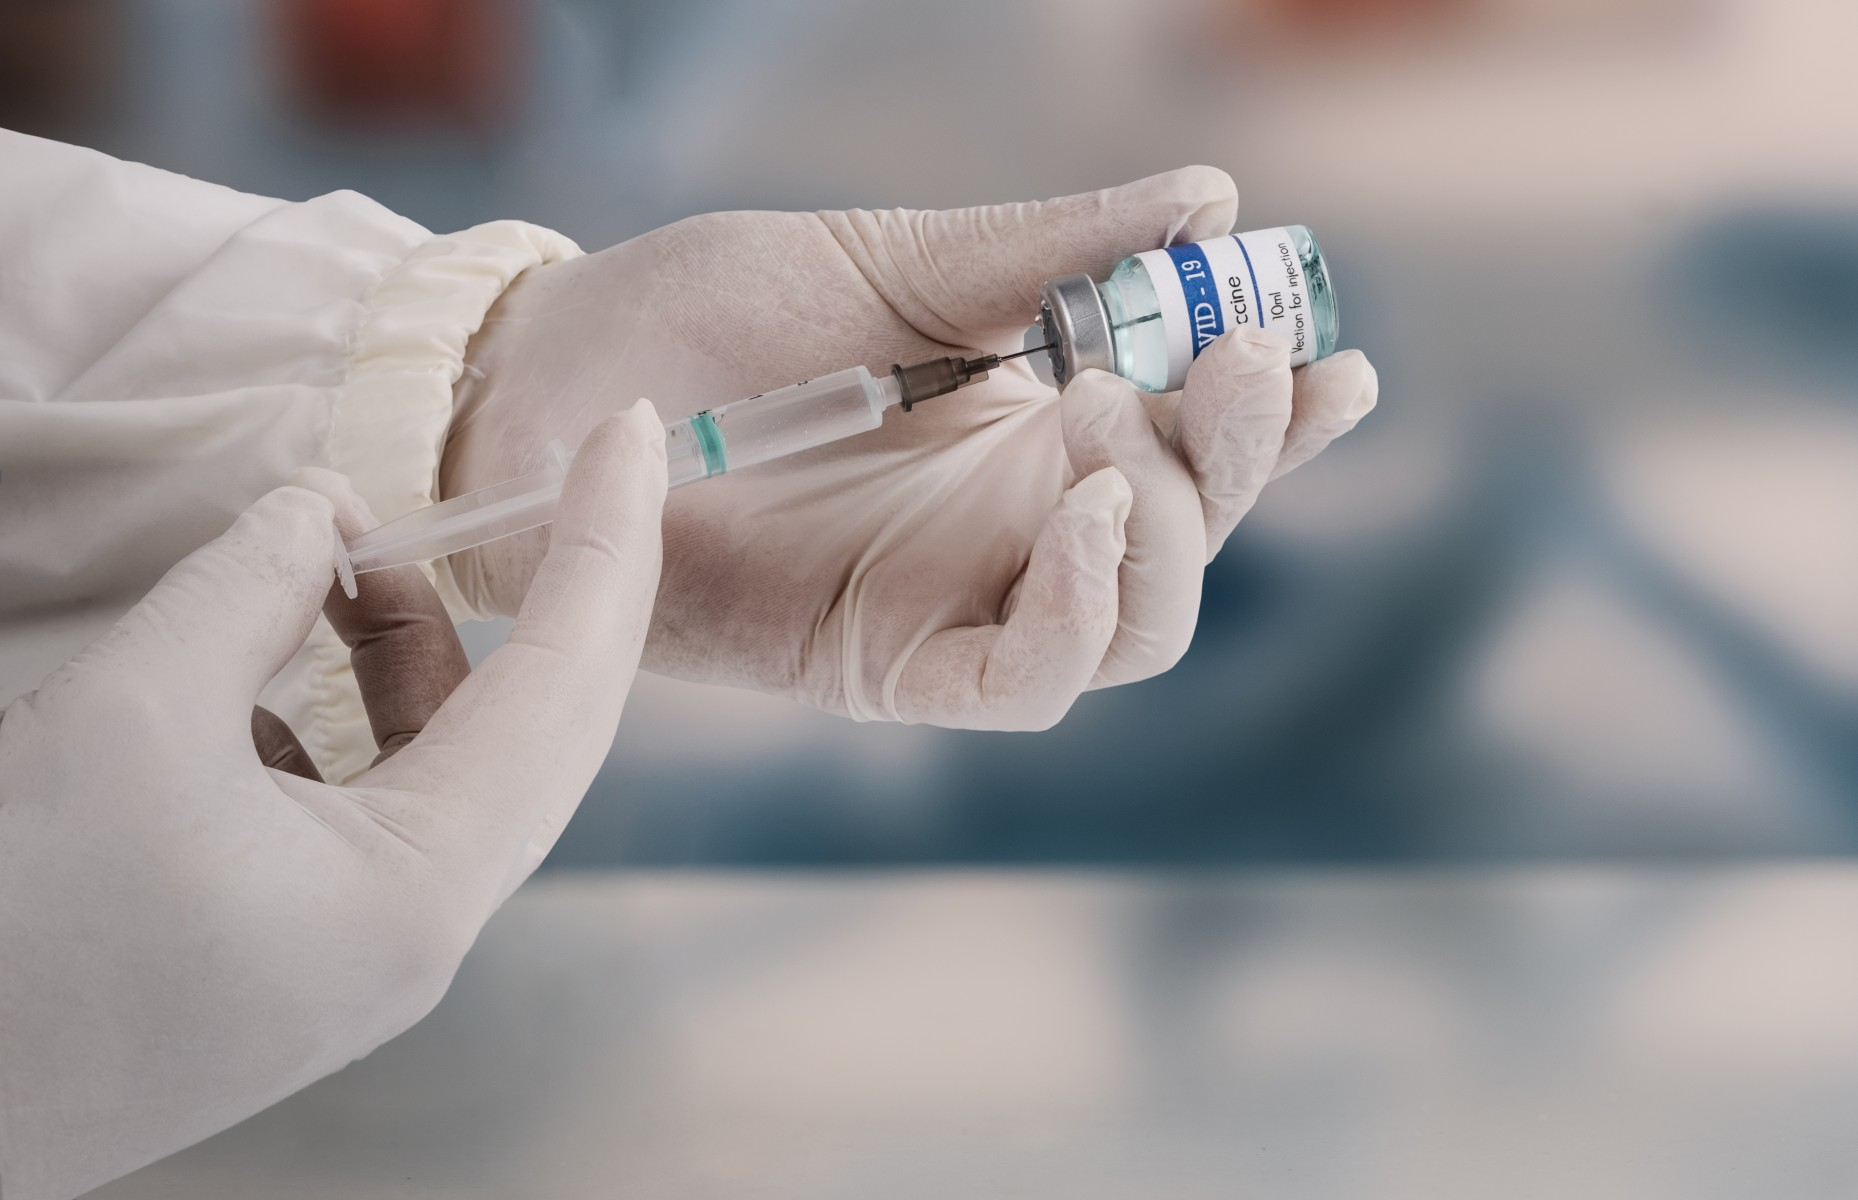

In [551]:
from IPython.display import Image, display
image_path = "C:/Users/User/Downloads/vaccine.jpeg"
display(Image(filename=image_path))

## Business Understanding

This project is crucial for public health authorities, healthcare providers, and policymakers. It impacts individuals and communities, especially those susceptible to influenza, as the predictions can guide targeted vaccination campaigns and health interventions. The primary business problem addressed is predicting the likelihood of individuals getting H1N1 and seasonal flu vaccines based on their backgrounds, opinions, and health behaviors. By understanding these patterns, health organizations can optimize vaccine distribution, communication strategies, and public health campaigns. This project focuses specifically on predicting vaccine uptake. It does not address the production, distribution, or manufacturing challenges associated with vaccines.Two datasets from Data-Driven are utilized. The first dataset contains information on the H1N1 vaccine, including features that might influence an individual's decision. The second dataset indicates which patients have taken either the H1N1 vaccine or the seasonal flu vaccine. These datasets provide valuable insights into the factors influencing vaccine decisions. The project is expected to be completed within a timeline of 6 days. This includes data exploration, preprocessing, model development, evaluation, and submittion.

### Problem Statement

In the era of global health crises, such as the H1N1 and seasonal flu outbreaks, it becomes imperative to devise proactive strategies for vaccine distribution and uptake. The project aims to harness the power of machine learning to predict individuals' likelihood of receiving H1N1 and seasonal flu vaccines. By leveraging comprehensive datasets containing information on respondents' backgrounds, opinions, and health behaviors, the project endeavors to unravel the intricate determinants influencing vaccination decisions.

### Main Objectives

* Develop accurate predictive models to estimate the likelihood of individuals opting for H1N1 and seasonal flu vaccines.
* Uncover critical features that significantly impact vaccination decisions.
* Provide stakeholders with nuanced insights to inform targeted intervention strategies for improving vaccine uptake.

In [552]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.svm import SVC, SVR
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.feature_selection import SelectKBest, f_classif, f_regression
from sklearn.pipeline import Pipeline

## Data Understanding

Two datasets are available from Data-Driven. The first dataset contains information on H1N1 vaccine features, and the second dataset indicates patients who have taken either the H1N1 vaccine or the seasonal flu vaccine. Data-Driven controls the data sources. The target is to predict the likelihood of individuals getting H1N1 and seasonal flu vaccines based on their backgrounds, opinions, and health behaviors. Our Predictors include various demographic, behavioral, and opinion-related features, such as h1n1_concern, h1n1_knowledge, behavioral_antiviral_meds, etc. The predictors include both numerical (float64, int64) and categorical (object) data types. The distribution of the data includes information on 26,707 respondents with 38 features. With over 26,000 observations, we have a sufficient amount of data to build predictive models without the need for resampling methods.



In [553]:
labels = pd.read_csv("training_set_labels.csv")
features = pd.read_csv ("training_set_features.csv")
features_test = pd.read_csv ("test_set_features.csv")

In [554]:
labels.head()

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,0,0,0
1,1,0,1
2,2,0,0
3,3,0,1
4,4,0,0


In [555]:
features.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


#### Merge the two datasets 
The datasets had already been split for training and testing so by merging these datasets allows you to combine the features and labels associated with each respondent into a single dataset. This allows us to perform our own training and testing. The resulting Vaccine dataset will have columns from both features and labels, and each row will represent a respondent with their associated features and vaccine labels. 

In [556]:
vaccine = pd.merge(features, labels, on='respondent_id', how='inner')

vaccine.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0


In [557]:
vaccine.describe()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children,h1n1_vaccine,seasonal_vaccine
count,26707.000000,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,...,26316.000000,26319.000000,26312.000000,26245.000000,26193.000000,26170.000000,26458.000000,26458.000000,26707.000000,26707.000000
mean,13353.000000,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,...,3.850623,2.342566,2.357670,4.025986,2.719162,2.118112,0.886499,0.534583,0.212454,0.465608
std,7709.791156,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,...,1.007436,1.285539,1.362766,1.086565,1.385055,1.332950,0.753422,0.928173,0.409052,0.498825
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,6676.500000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,...,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,13353.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,...,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000
75%,20029.500000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,...,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,1.000000,1.000000,0.000000,1.000000
max,26706.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000,1.000000,1.000000


In [558]:
vaccine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

In [559]:
vaccine_counts_h1n1 = vaccine['h1n1_vaccine'].value_counts()
vaccine_counts_seasonal = vaccine['seasonal_vaccine'].value_counts()

print("Value Counts for h1n1_vaccine:\n", vaccine_counts_h1n1)
print("\nValue Counts for seasonal_vaccine:\n", vaccine_counts_seasonal)


Value Counts for h1n1_vaccine:
 h1n1_vaccine
0    21033
1     5674
Name: count, dtype: int64

Value Counts for seasonal_vaccine:
 seasonal_vaccine
0    14272
1    12435
Name: count, dtype: int64


For 'h1n1_vaccine':
21,033 respondents do not have the h1n1 vaccine and 5,674 respondents have received the h1n1 vaccine.
For 'seasonal_vaccine':
14,272 respondents do not have the seasonal flu vaccine and 12,435 respondents have received the seasonal flu vaccine.

This shows that the 'seasonal_vaccine' class distribution is more balanced compared to the 'h1n1_vaccine' class distribution. 

In [560]:
vaccine.shape

(26707, 38)

### Visualization of Distribution

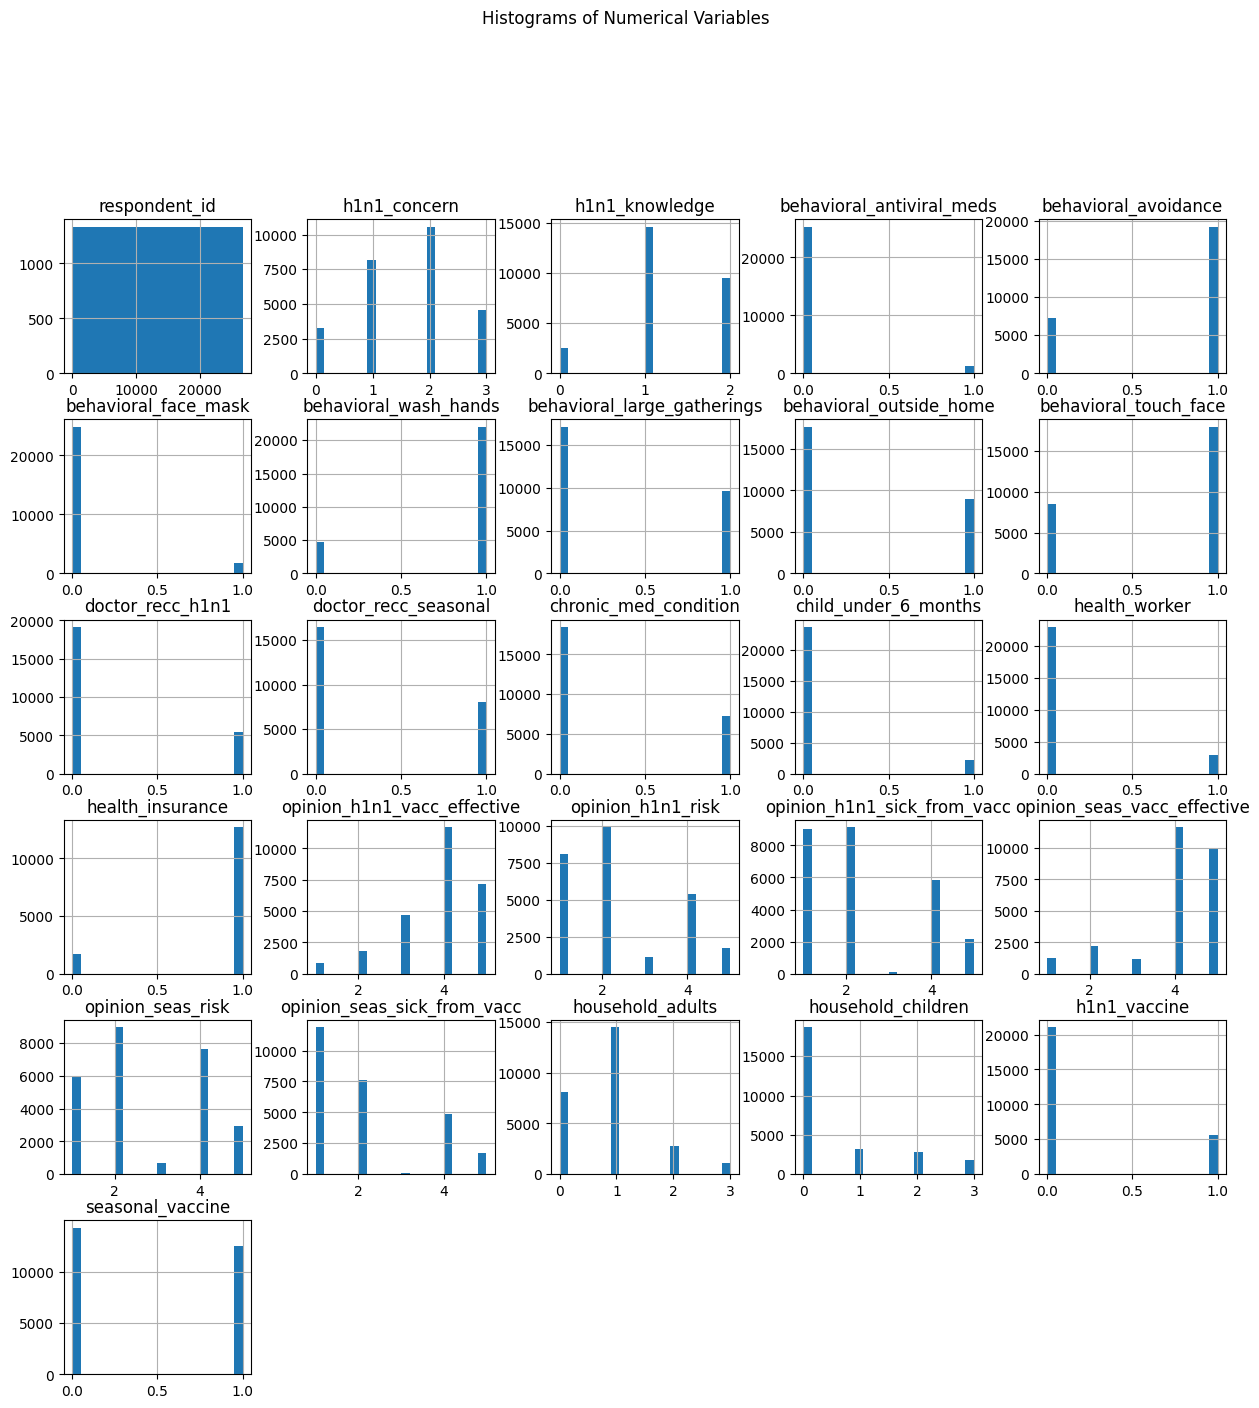

In [561]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numerical columns
numerical_columns = vaccine.select_dtypes(include=['float64', 'int64']).columns

# Plot histograms for numerical variables
vaccine[numerical_columns].hist(figsize=(15, 15), bins=20)
plt.suptitle('Histograms of Numerical Variables', y=1.02)
plt.show()


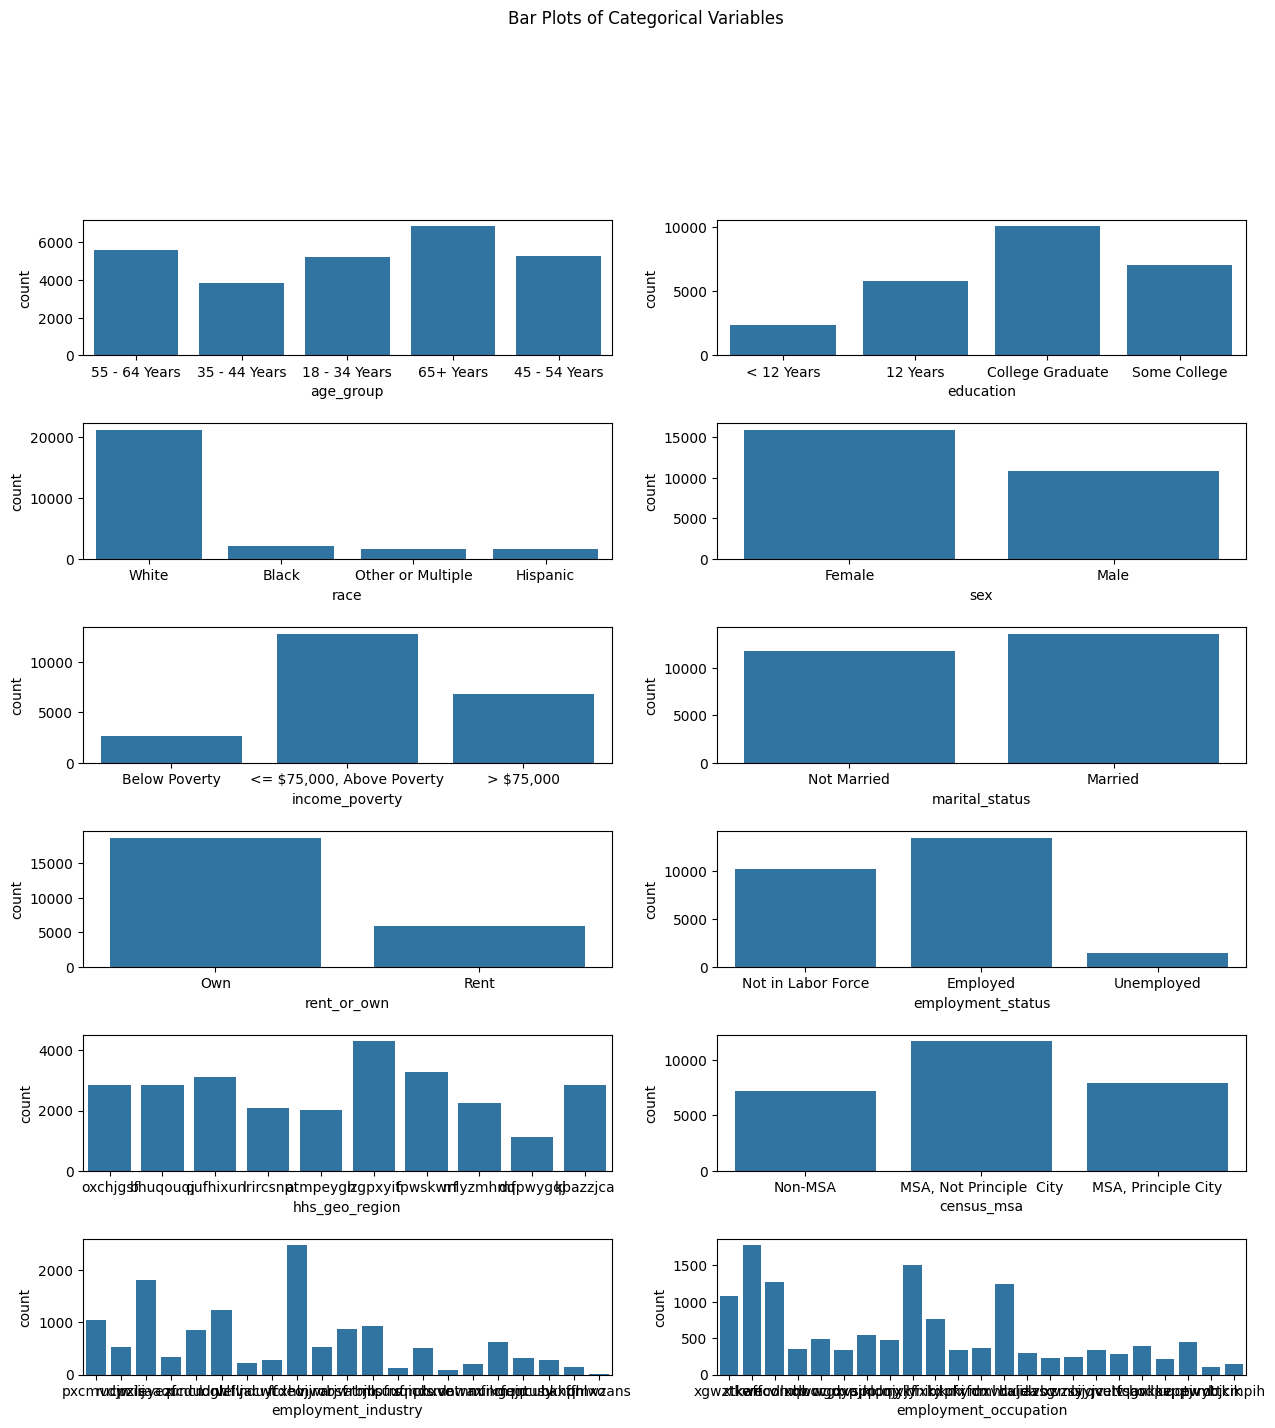

In [562]:
# Select categorical columns
categorical_columns = vaccine.select_dtypes(include='object').columns

# Plot bar plots for categorical variables
fig, axes = plt.subplots(nrows=len(categorical_columns)//2, ncols=2, figsize=(15, 15))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(categorical_columns):
    sns.countplot(x=col, data=vaccine, ax=axes[i//2, i%2])

plt.suptitle('Bar Plots of Categorical Variables', y=1.02)
plt.show()


## Data Preparation

### Data Cleaning

In [563]:
vaccine.isnull().sum()

respondent_id                      0
h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
m

In [564]:
columns_to_drop = ['health_insurance', 'employment_industry', 'employment_occupation']
vaccine.drop(columns=columns_to_drop, errors='ignore', inplace=True)


In [565]:
# Assuming 'vaccine' is your DataFrame
vaccine = vaccine.dropna()
vaccine = vaccine.dropna(axis=1)
columns_to_drop_na = ['h1n1_vaccine', 'seasonal_vaccine']
vaccine = vaccine.dropna(subset=columns_to_drop_na)

In [566]:
vaccine.duplicated().sum()

0

In [567]:
# Filling missing values for numeric datatypes with Median
numeric_cols = features_test.select_dtypes(exclude='object').columns
features_test[numeric_cols] = features_test[numeric_cols].fillna(features_test[numeric_cols].median())

# Filling missing values for object datatypes with Mode
object_cols = features_test.select_dtypes(include='object').columns
features_test[object_cols] = features_test[object_cols].fillna(features_test[object_cols].mode().iloc[0])

missing_values = features_test.isnull().sum()
missing_values


respondent_id                  0
h1n1_concern                   0
h1n1_knowledge                 0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_h1n1               0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
health_insurance               0
opinion_h1n1_vacc_effective    0
opinion_h1n1_risk              0
opinion_h1n1_sick_from_vacc    0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
age_group                      0
education                      0
race                           0
sex                            0
income_poverty                 0
marital_status                 0
rent_or_own                    0
employment_status              0
hhs_geo_re

## EDA

In [568]:
str_cols = vaccine.select_dtypes(include = 'object').columns
vaccine[str_cols].head()

,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa
0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA
1,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City"
3,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City"
4,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City"
5,65+ Years,12 Years,White,Male,"<= $75,000, Above Poverty",Married,Own,Employed,atmpeygn,"MSA, Principle City"


In [569]:
# Mapping dictionary for binary encoding
binary_mapping = {'55 - 64 Years': 0, '35 - 44 Years': 1, '18 - 34 Years': 2, '65+ Years': 3, '45 - 54 Years': 4,
                  '< 12 Years': 0, '12 Years': 1, 'College Graduate': 2, 'Some College': 3,
                  'White': 1, 'Female': 0, 'Male': 1,
                  'Below Poverty': 0, '<= $75,000, Above Poverty': 1, '> $75,000': 2,
                  'Not Married': 0, 'Married': 1,
                  'Own': 0, 'Rent': 1,
                  'Not in Labor Force': 0, 'Employed': 1,
                  'oxchjgsf': 0, 'bhuqouqj': 1, 'qufhixun': 2, 'lrircsnp': 3,
                  'Non-MSA': 0, 'MSA, Not Principle City': 1, 'MSA, Principle City': 2}

# Apply mapping to each column
vaccine_encoded = vaccine.replace(binary_mapping)

vaccine_encoded.drop(columns=['census_msa'], inplace=True)
vaccine_encoded.head()    

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,household_adults,household_children,h1n1_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0,0,0,0,0,0,0.0,0.0,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,1,0,0,1,1,1,0.0,0.0,0,1
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0,0,0,1,0,3,0.0,0.0,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0,1,1,0,1,2,1.0,0.0,0,0
5,5,3.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1,1,1,0,1,atmpeygn,2.0,3.0,0,0


In [570]:
vaccine_encoded.dtypes

respondent_id                    int64
h1n1_concern                   float64
h1n1_knowledge                 float64
behavioral_antiviral_meds      float64
behavioral_avoidance           float64
behavioral_face_mask           float64
behavioral_wash_hands          float64
behavioral_large_gatherings    float64
behavioral_outside_home        float64
behavioral_touch_face          float64
doctor_recc_h1n1               float64
doctor_recc_seasonal           float64
chronic_med_condition          float64
child_under_6_months           float64
health_worker                  float64
opinion_h1n1_vacc_effective    float64
opinion_h1n1_risk              float64
opinion_h1n1_sick_from_vacc    float64
opinion_seas_vacc_effective    float64
opinion_seas_risk              float64
opinion_seas_sick_from_vacc    float64
age_group                        int64
education                        int64
race                            object
sex                              int64
income_poverty           

In [571]:
# object columns
object_columns = ['race', 'employment_status', 'hhs_geo_region']

label_encoder = LabelEncoder()

for column in object_columns:
    unique_values = vaccine_encoded[column].unique()
    
    # If there is a mix of data types, convert them to strings
    if any(isinstance(value, (int, float)) for value in unique_values):
        vaccine_encoded[column] = vaccine_encoded[column].astype(str)

# label encoding to each object column
for column in object_columns:
    vaccine_encoded[column] = label_encoder.fit_transform(vaccine_encoded[column])

vaccine_encoded.dtypes

respondent_id                    int64
h1n1_concern                   float64
h1n1_knowledge                 float64
behavioral_antiviral_meds      float64
behavioral_avoidance           float64
behavioral_face_mask           float64
behavioral_wash_hands          float64
behavioral_large_gatherings    float64
behavioral_outside_home        float64
behavioral_touch_face          float64
doctor_recc_h1n1               float64
doctor_recc_seasonal           float64
chronic_med_condition          float64
child_under_6_months           float64
health_worker                  float64
opinion_h1n1_vacc_effective    float64
opinion_h1n1_risk              float64
opinion_h1n1_sick_from_vacc    float64
opinion_seas_vacc_effective    float64
opinion_seas_risk              float64
opinion_seas_sick_from_vacc    float64
age_group                        int64
education                        int64
race                             int32
sex                              int64
income_poverty           

In [572]:
vaccine_encoded.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,household_adults,household_children,h1n1_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0,0,0,0,0,0,0.0,0.0,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,1,0,0,1,1,1,0.0,0.0,0,1
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0,0,0,1,0,3,0.0,0.0,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0,1,1,0,1,2,1.0,0.0,0,0
5,5,3.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1,1,1,0,1,4,2.0,3.0,0,0


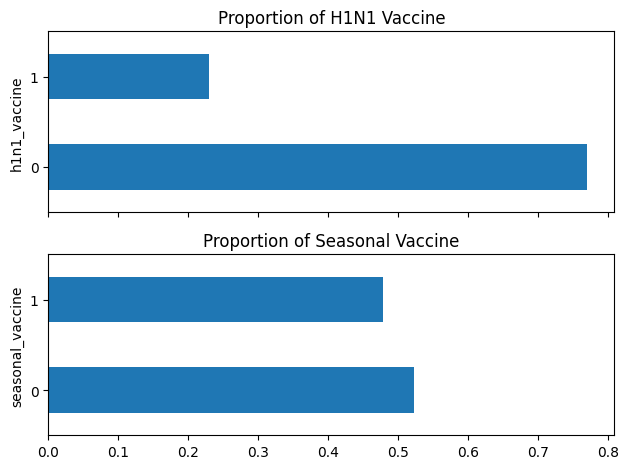

In [573]:
fig, ax = plt.subplots(2, 1, sharex=True)

total_obv = vaccine.shape[0]

(vaccine['h1n1_vaccine']
    .value_counts()
    .div(total_obv)
    .plot.barh(title="Proportion of H1N1 Vaccine", ax=ax[0])
)
ax[0].set_ylabel("h1n1_vaccine")

(vaccine['seasonal_vaccine']
    .value_counts()
    .div(total_obv)
    .plot.barh(title="Proportion of Seasonal Vaccine", ax=ax[1])
)
ax[1].set_ylabel("seasonal_vaccine")

fig.tight_layout()
plt.show()


From the above, we can see more people have taken the Seasonal Vaccine as compared to the H1N1 Vaccine.

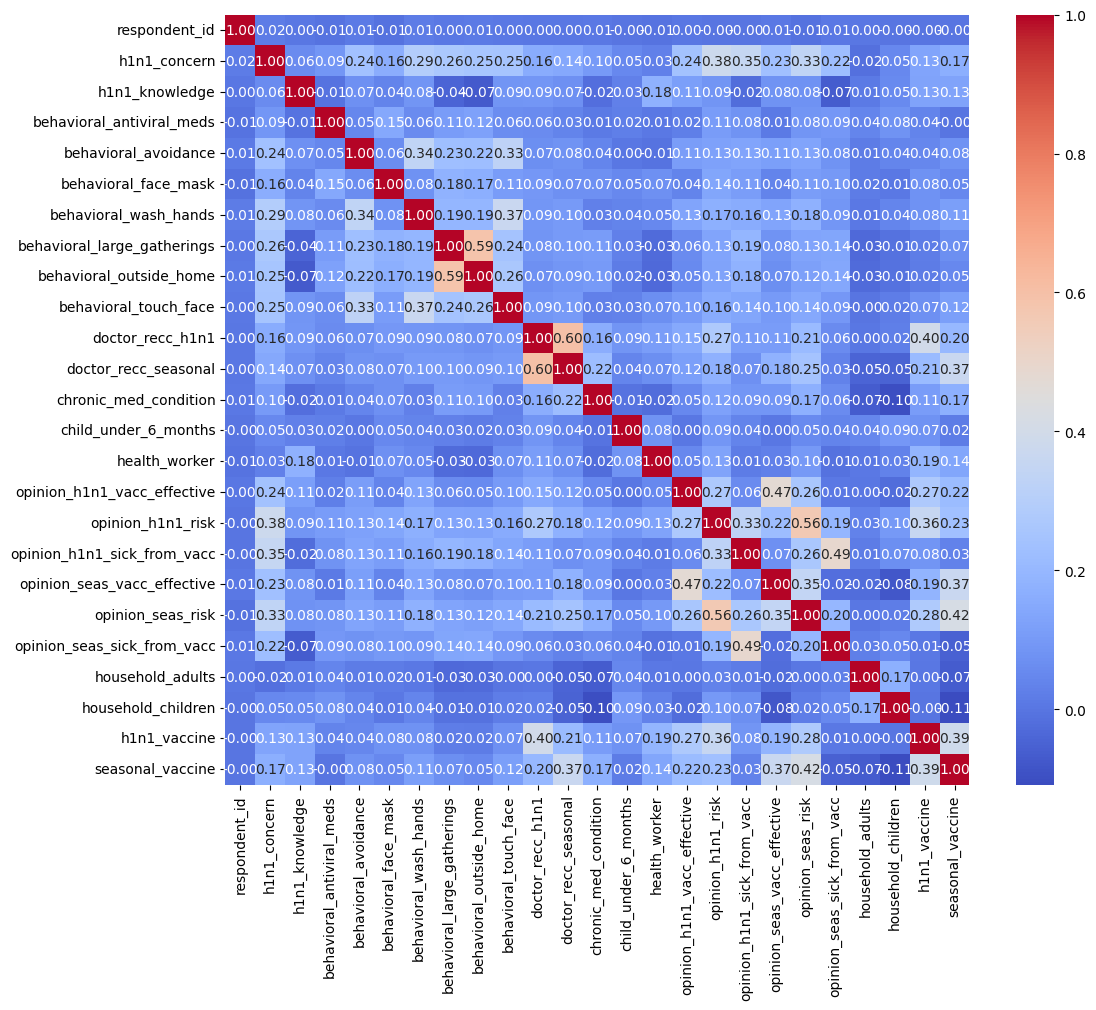

In [574]:
# non-numeric columns
non_numeric_columns = vaccine.select_dtypes(exclude=['float64', 'int64']).columns

# Drop non-numeric columns
numeric_df = vaccine.drop(columns=non_numeric_columns)

# correlation matrix
correlation_matrix = numeric_df.corr()

# Specify target variables and threshold
target_variables = ["h1n1_vaccine", "seasonal_vaccine"]
threshold = 0.2

relevant_features = []
for target_variable in target_variables:
    relevant_features.extend(correlation_matrix[target_variable][abs(correlation_matrix[target_variable]) > threshold].index.tolist())

relevant_features = list(set(relevant_features)) 

selected_features_df = vaccine[relevant_features]

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

In [575]:
# non-numeric columns
non_numeric_columns = vaccine.select_dtypes(exclude=['float64', 'int64']).columns

# Drop non-numeric columns 
numeric_df = vaccine.drop(columns=non_numeric_columns)

# Compute correlation matrix
correlation_matrix = numeric_df.corr()

# Specify target variables and threshold
target_variables = ["h1n1_vaccine", "seasonal_vaccine"]
threshold = 0.2

for target_variable in target_variables:
    relevant_features = correlation_matrix[target_variable][abs(correlation_matrix[target_variable]) > threshold].index.tolist()
    
    print(f"\nCorrelation with {target_variable}:")
    print(correlation_matrix[target_variable][relevant_features].sort_values(ascending=False))



Correlation with h1n1_vaccine:
h1n1_vaccine                   1.000000
doctor_recc_h1n1               0.396932
seasonal_vaccine               0.388223
opinion_h1n1_risk              0.355359
opinion_seas_risk              0.278787
opinion_h1n1_vacc_effective    0.272866
doctor_recc_seasonal           0.211108
Name: h1n1_vaccine, dtype: float64

Correlation with seasonal_vaccine:
seasonal_vaccine               1.000000
opinion_seas_risk              0.415801
h1n1_vaccine                   0.388223
doctor_recc_seasonal           0.367269
opinion_seas_vacc_effective    0.365565
opinion_h1n1_risk              0.233296
opinion_h1n1_vacc_effective    0.215492
doctor_recc_h1n1               0.202109
Name: seasonal_vaccine, dtype: float64


From the above correlation results we can see that the **"h1n1_vaccine"** shows:

Strong positive correlation with "doctor_recc_h1n1" (H1N1 flu vaccine was recommended by doctor), (0.39).
Moderate positive correlations with "seasonal_vaccine" (0.38), "opinion_h1n1_risk"(Respondent's opinion about risk of getting sick with H1N1 flu without vaccine.)" (0.32), and "opinion_h1n1_vacc_effective (Respondent's opinion about H1N1 vaccine effectiveness.)" (0.2)

We can also observe that for the **"seasonal_vaccine"**:

Strong positive correlation with "opinion_seas_risk (Respondent's opinion about risk of getting sick with seasonal flu without vaccine.)" (0.39), "h1n1_vaccine" (0.38), and "doctor_recc_seasonal" ( Seasonal flu vaccine was recommended by doctor.) (0.37).
Moderate positive correlations with "opinion_seas_vacc_effective" (Respondent's opinion about seasonal flu vaccine effectiveness.) (0.36)

## Modeling

For this project, we are dealing with a classification task since the goal is to predict whether individuals will get the H1N1 and seasonal flu vaccines based on their characteristics and behaviors. The models we will try can include logistic regression, decision trees, random forests and XGBoost. The threshold of performance considered in this case is, achieving a high accuracy, precision, and recall for predicting vaccine uptake would be desirable. 

### Simple Baseline Model : Logistic Regression

In [576]:
# Split the data into features (X) and target variables (y)
X = vaccine_encoded.drop(['h1n1_vaccine', 'seasonal_vaccine'], axis=1)
y_h1n1 = vaccine_encoded['h1n1_vaccine']
y_seasonal = vaccine_encoded['seasonal_vaccine']


In [577]:
# Split the data into training and testing sets
X_train_h1n1, X_test_h1n1, y_train_h1n1, y_test_h1n1 = train_test_split(X, y_h1n1, test_size=0.2, random_state=42)
X_train_seasonal, X_test_seasonal, y_train_seasonal, y_test_seasonal = train_test_split(X, y_seasonal, test_size=0.2, random_state=42)


In [578]:
# Initialize and fit logistic regression models with increased max_iter
model_h1n1 = LogisticRegression(random_state=42, max_iter=1000)
model_seasonal = LogisticRegression(random_state=42, max_iter=1000)
model_h1n1.fit(X_train_h1n1, y_train_h1n1)
model_seasonal.fit(X_train_seasonal, y_train_seasonal)

LogisticRegression(max_iter=1000, random_state=42)

In [579]:
# Make predictions
y_pred_h1n1 = model_h1n1.predict(X_test_h1n1)
y_pred_seasonal = model_seasonal.predict(X_test_seasonal)

In [580]:
#preventing overfitting using l1
model_h1n1 = LogisticRegression(penalty='l1', random_state=42)
model_seasonal = LogisticRegression(penalty='l1', random_state=42)

In [581]:
# Evaluate the models
print("\H1N1 Vaccine Model:")
print(classification_report(y_test_h1n1, y_pred_h1n1))
print("Accuracy:", accuracy_score(y_test_h1n1, y_pred_h1n1))

print("\nSeasonal Vaccine Model:")
print(classification_report(y_test_seasonal, y_pred_seasonal))
print("Accuracy:", accuracy_score(y_test_seasonal, y_pred_seasonal))


\H1N1 Vaccine Model:
              precision    recall  f1-score   support

           0       0.82      0.94      0.88      3029
           1       0.60      0.32      0.42       900

    accuracy                           0.80      3929
   macro avg       0.71      0.63      0.65      3929
weighted avg       0.77      0.80      0.77      3929

Accuracy: 0.7951132603715958

Seasonal Vaccine Model:
              precision    recall  f1-score   support

           0       0.75      0.77      0.76      2034
           1       0.75      0.73      0.74      1895

    accuracy                           0.75      3929
   macro avg       0.75      0.75      0.75      3929
weighted avg       0.75      0.75      0.75      3929

Accuracy: 0.7503181471112242


**Accuracy**: 
The models are decently accurate, but it's essential to consider precision, recall, and F1-score for a more detailed evaluatioy class.

**Precision-Recall Trade-off**:
For the h1n1_vaccine model, there is a trade-off between precision and recall. Higher precision typically results in lower recall and vice versa. A higher recall is desirable in scenarios where missing positive instances (false negatives) is a more significant concern.

**Class Imbalance**: The differences in precision and recall might be influenced by class imbalance. If one class has significantly fewer instances than the other, it can impact the model's ability to learn patterns for the minority class.

#### Confusion Matrix 

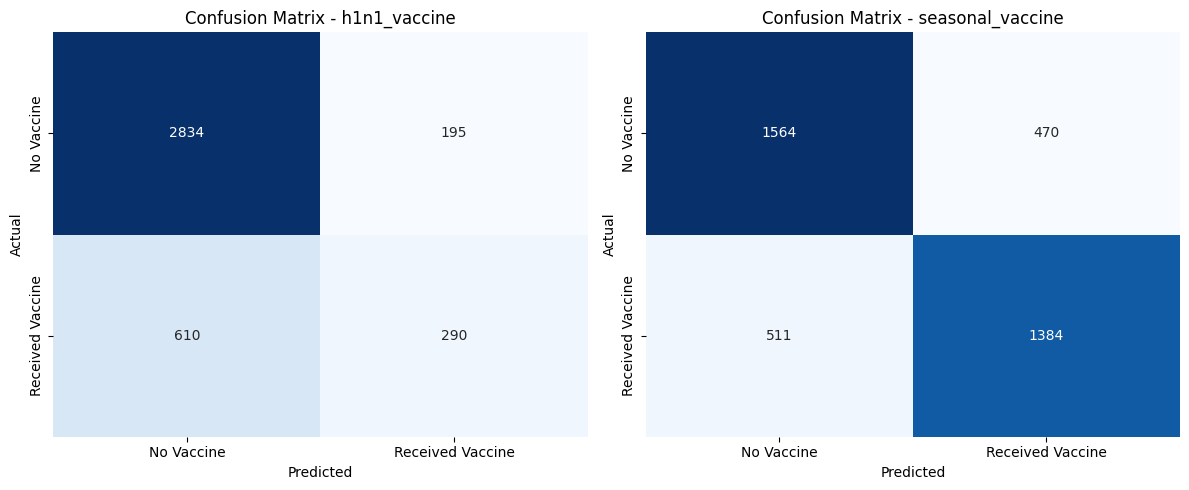

In [582]:
# h1n1_vaccine
cm_h1n1 = confusion_matrix(y_test_h1n1, y_pred_h1n1)

# seasonal_vaccine
cm_seasonal = confusion_matrix(y_test_seasonal, y_pred_seasonal)

# Plotting confusion matrices
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.heatmap(cm_h1n1, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Vaccine', 'Received Vaccine'],
            yticklabels=['No Vaccine', 'Received Vaccine'])
plt.title('Confusion Matrix - h1n1_vaccine')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.subplot(1, 2, 2)
sns.heatmap(cm_seasonal, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Vaccine', 'Received Vaccine'],
            yticklabels=['No Vaccine', 'Received Vaccine'])
plt.title('Confusion Matrix - seasonal_vaccine')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()


### Decision Tree Model

In [583]:
# Split the data into features (X) and target variables (y)
X = vaccine_encoded.drop(['h1n1_vaccine', 'seasonal_vaccine'], axis=1)
y_h1n1 = vaccine_encoded['h1n1_vaccine']
y_seasonal = vaccine_encoded['seasonal_vaccine']

In [584]:
# Split the data into training and testing sets
X_train_h1n1, X_test_h1n1, y_train_h1n1, y_test_h1n1 = train_test_split(X, y_h1n1, test_size=0.2, random_state=42)
X_train_seasonal, X_test_seasonal, y_train_seasonal, y_test_seasonal = train_test_split(X, y_seasonal, test_size=0.2, random_state=42)

In [585]:
tree_model_h1n1_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42)
tree_model_seasonal_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42)

tree_model_h1n1_entropy.fit(X_train_h1n1, y_train_h1n1)
tree_model_seasonal_entropy.fit(X_train_seasonal, y_train_seasonal)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [586]:
# Make predictions
y_pred_h1n1_tree = tree_model_h1n1.predict(X_test_h1n1)
y_pred_seasonal_tree = tree_model_seasonal.predict(X_test_seasonal)

In [587]:
# Evaluate the models
print("Decision Tree - H1N1 Vaccine Model:")
print(classification_report(y_test_h1n1, y_pred_h1n1_tree))
print("Accuracy:", accuracy_score(y_test_h1n1, y_pred_h1n1_tree))

print("\nDecision Tree - Seasonal Vaccine Model:")
print(classification_report(y_test_seasonal, y_pred_seasonal_tree))
print("Accuracy:", accuracy_score(y_test_seasonal, y_pred_seasonal_tree))

Decision Tree - H1N1 Vaccine Model:
              precision    recall  f1-score   support

           0       0.83      0.82      0.83      3029
           1       0.43      0.45      0.44       900

    accuracy                           0.74      3929
   macro avg       0.63      0.64      0.63      3929
weighted avg       0.74      0.74      0.74      3929

Accuracy: 0.7363196742173581

Decision Tree - Seasonal Vaccine Model:
              precision    recall  f1-score   support

           0       0.69      0.68      0.68      2034
           1       0.66      0.67      0.67      1895

    accuracy                           0.67      3929
   macro avg       0.67      0.67      0.67      3929
weighted avg       0.67      0.67      0.67      3929

Accuracy: 0.6747263934843472


**H1N1 Vaccine Model:**
Precision:
Precision for predicting individuals who did not take the H1N1 vaccine (class 0) is high at 83%.
Precision for predicting individuals who took the H1N1 vaccine (class 1) is lower at 43%.
Recall:
Recall for class 0 is 82%, indicating a good ability to correctly identify those who did not take the H1N1 vaccine.
Recall for class 1 is 45%, showing a moderate ability to identify those who did take the H1N1 vaccine.
F1-Score:
The overall F1-Score is balanced, reflecting a trade-off between precision and recall.
Accuracy:
The model has an overall accuracy of approximately 74%.

**Seasonal Vaccine Model:**
Precision:
Precision for predicting individuals who did not take the seasonal flu vaccine (class 0) is 69%.
Precision for predicting individuals who took the seasonal flu vaccine (class 1) is 66%.
Recall:
Recall for class 0 is 68%, indicating a good ability to correctly identify those who did not take the seasonal flu vaccine.
Recall for class 1 is 67%, showing a balanced ability to identify those who did take the seasonal flu vaccine.
F1-Score:
The overall F1-Score is balanced, reflecting a trade-off between precision and recall.
Accuracy:
The model has an overall accuracy of approximately 67%.

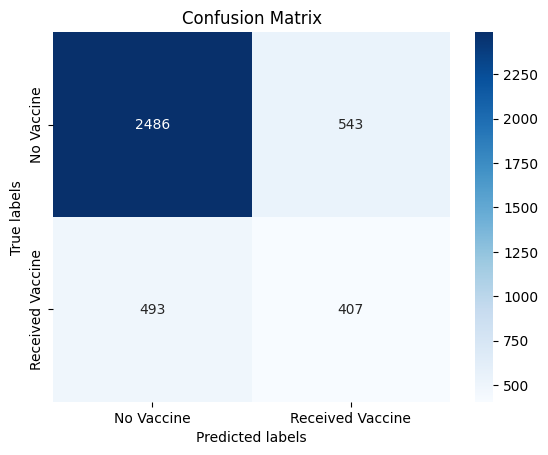

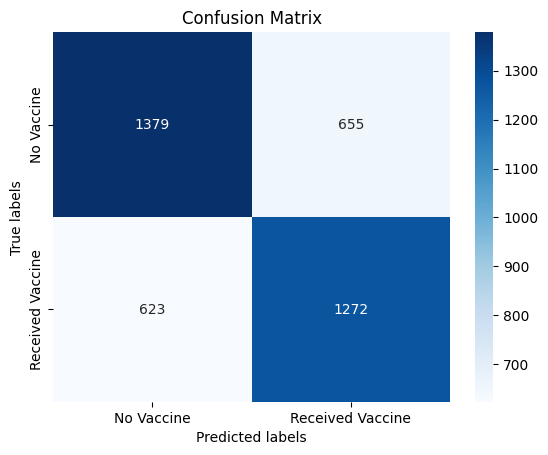

In [588]:
# confusion matrix
def plot_confusion_matrix(y_true, y_pred, labels):
    cm = confusion_matrix(y_true, y_pred)
    ax = plt.subplot()
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=ax)
    
    # labels, title and ticks
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix')
    ax.xaxis.set_ticklabels(labels)
    ax.yaxis.set_ticklabels(labels)
    
    plt.show()
plot_confusion_matrix(y_test_h1n1, y_pred_h1n1_tree, labels=['No Vaccine', 'Received Vaccine'])
plot_confusion_matrix(y_test_seasonal, y_pred_seasonal_tree, labels=['No Vaccine', 'Received Vaccine'])

### Random Forest Classifier

In [589]:
# Split the data into features (X) and target variables (y)
X = vaccine_encoded.drop(['h1n1_vaccine', 'seasonal_vaccine'], axis=1)
y_h1n1 = vaccine_encoded['h1n1_vaccine']
y_seasonal = vaccine_encoded['seasonal_vaccine']

In [590]:
# Split the data into training and testing sets
X_train_h1n1, X_test_h1n1, y_train_h1n1, y_test_h1n1 = train_test_split(X, y_h1n1, test_size=0.2, random_state=42)
X_train_seasonal, X_test_seasonal, y_train_seasonal, y_test_seasonal = train_test_split(X, y_seasonal, test_size=0.2, random_state=42)

In [591]:
# Initialize and fit Random Forest models
rf_model_h1n1 = RandomForestClassifier(random_state=42)
rf_model_seasonal = RandomForestClassifier(random_state=42)

rf_model_h1n1.fit(X_train_h1n1, y_train_h1n1)
rf_model_seasonal.fit(X_train_seasonal, y_train_seasonal)

RandomForestClassifier(random_state=42)

In [592]:
# Make predictions
y_pred_h1n1_rf = rf_model_h1n1.predict(X_test_h1n1)
y_pred_seasonal_rf = rf_model_seasonal.predict(X_test_seasonal)

In [593]:
print("Random Forest - H1N1 Vaccine Model:")
print(classification_report(y_test_h1n1, y_pred_h1n1_rf))
print("Accuracy:", accuracy_score(y_test_h1n1, y_pred_h1n1_rf))
print("Confusion Matrix:")
print(confusion_matrix(y_test_h1n1, y_pred_h1n1_rf))

Random Forest - H1N1 Vaccine Model:
              precision    recall  f1-score   support

           0       0.85      0.94      0.90      3029
           1       0.70      0.45      0.55       900

    accuracy                           0.83      3929
   macro avg       0.78      0.69      0.72      3929
weighted avg       0.82      0.83      0.82      3929

Accuracy: 0.829727666072792
Confusion Matrix:
[[2859  170]
 [ 499  401]]


In [594]:
print("\nRandom Forest - Seasonal Vaccine Model:")
print(classification_report(y_test_seasonal, y_pred_seasonal_rf))
print("Accuracy:", accuracy_score(y_test_seasonal, y_pred_seasonal_rf))
print("Confusion Matrix:")
print(confusion_matrix(y_test_seasonal, y_pred_seasonal_rf))


Random Forest - Seasonal Vaccine Model:
              precision    recall  f1-score   support

           0       0.78      0.80      0.79      2034
           1       0.78      0.75      0.76      1895

    accuracy                           0.78      3929
   macro avg       0.78      0.78      0.78      3929
weighted avg       0.78      0.78      0.78      3929

Accuracy: 0.7765334690761008
Confusion Matrix:
[[1627  407]
 [ 471 1424]]


### XGBoost

In [622]:
from xgboost import XGBClassifier

X = vaccine_encoded.drop(['respondent_id', 'h1n1_vaccine', 'seasonal_vaccine'], axis=1)
y_h1n1 = vaccine_encoded['h1n1_vaccine']
y_seasonal = vaccine_encoded['seasonal_vaccine']

# training and testing 
X_train, X_test, y_h1n1_train, y_h1n1_test, y_seasonal_train, y_seasonal_test = train_test_split(
    X, y_h1n1, y_seasonal, test_size=0.2, random_state=42
)

#  XGBoost model for H1N1 vaccine
model_h1n1 = XGBClassifier()
model_h1n1.fit(X_train, y_h1n1_train)

# Predict 
y_h1n1_pred = model_h1n1.predict(X_test)

# Evaluate the model
print("H1N1 Vaccine Model:")
print(classification_report(y_h1n1_test, y_h1n1_pred))
print("Accuracy:", accuracy_score(y_h1n1_test, y_h1n1_pred))
print(confusion_matrix(y_h1n1_test, y_h1n1_pred))

# train XGBoost model for Seasonal vaccine
model_seasonal = XGBClassifier()
model_seasonal.fit(X_train, y_seasonal_train)

# Predict 
y_seasonal_pred = model_seasonal.predict(X_test)

print("\nSeasonal Vaccine Model:")
print(classification_report(y_seasonal_test, y_seasonal_pred))
print("Accuracy:", accuracy_score(y_seasonal_test, y_seasonal_pred))


H1N1 Vaccine Model:
              precision    recall  f1-score   support

           0       0.86      0.92      0.89      3029
           1       0.64      0.49      0.56       900

    accuracy                           0.82      3929
   macro avg       0.75      0.70      0.72      3929
weighted avg       0.81      0.82      0.81      3929

Accuracy: 0.821074064647493
[[2786  243]
 [ 460  440]]

Seasonal Vaccine Model:
              precision    recall  f1-score   support

           0       0.77      0.79      0.78      2034
           1       0.77      0.75      0.76      1895

    accuracy                           0.77      3929
   macro avg       0.77      0.77      0.77      3929
weighted avg       0.77      0.77      0.77      3929

Accuracy: 0.7686434207177398


### Tuning Our models 

NameError: name 'train_data' is not defined

## Evaluation

## Conclusion

## Recommendation